# 🏠 House Price Prediction

### 1. Project Overview <a id='overview'></a>

The Ames Housing Dataset presents a **regression problem** where we aim to predict the sale price of residential properties based on their various characteristics. This is a classic supervised learning task with practical applications in:

- **Real Estate Valuation**: Helping buyers and sellers determine fair market prices
- **Property Investment**: Identifying undervalued properties for investment opportunities
- **Mortgage Lending**: Banks can assess property values for loan approvals
- **Tax Assessment**: Municipal authorities can estimate property values for taxation

### How Machine Learning Models Can Help:

1. **Pattern Recognition**: ML models can identify complex relationships between features (e.g., how location, size, and quality interact to influence price)
2. **Non-linear Relationships**: Unlike simple linear regression, advanced models can capture non-linear patterns
3. **Feature Importance**: Models can reveal which factors most influence housing prices
4. **Automated Valuation**: Once trained, models can instantly estimate prices for new properties


### 📊 Dataset
The Ames Housing dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

### 🔧 Approach
- Comprehensive EDA with visualizations
- Advanced feature engineering
- Multiple model comparison
- Hyperparameter optimization
- Ensemble methods for best performance

## 2. Import Libraries & Configuration <a id='imports'></a>

In [36]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
from pathlib import Path
import os, sys, json, math, random, warnings
from typing import Tuple, List, Dict, Optional
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import skew, norm, probplot
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Machine Learning - Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder, PowerTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, clone

# Machine Learning - Models
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import xgboost as xgb

# Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error
from sklearn.inspection import permutation_importance

# Advanced optimization
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Plot settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Custom color palette
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#F8B739']

SEED = 42
np.random.seed(SEED); random.seed(SEED)

DATA_PATH = "data/train.csv" 

print('✅ All libraries imported successfully!')
print(f'Pandas version: {pd.__version__}')
print(f'NumPy version: {np.__version__}')
print(f'XGBoost version: {xgb.__version__}')

✅ All libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.4
XGBoost version: 3.1.1


## 3. Data Loading & Initial Exploration <a id='loading'></a>

In [37]:
# Load the data
df = pd.read_csv(DATA_PATH)
# Initial data preprocessing
df.drop(columns=['Id'], inplace=True)

# Display basic info
print(f"📊 Dataset Information:")
print(f"Training set size: {df.shape[0]} samples, {df.shape[1]} features")
print(f"\nTarget variable (SalePrice) statistics:")
print(df['SalePrice'].describe())

📊 Dataset Information:
Training set size: 1460 samples, 80 features

Target variable (SalePrice) statistics:
count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64


## 4. Exploratory Data Analysis (EDA) <a id='eda'></a>

### 4.1 Fist Look at the data

In [38]:
print("First 5 rows:")
display(df.head())

print("\nDataset Info:")
df.info()

First 5 rows:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64 

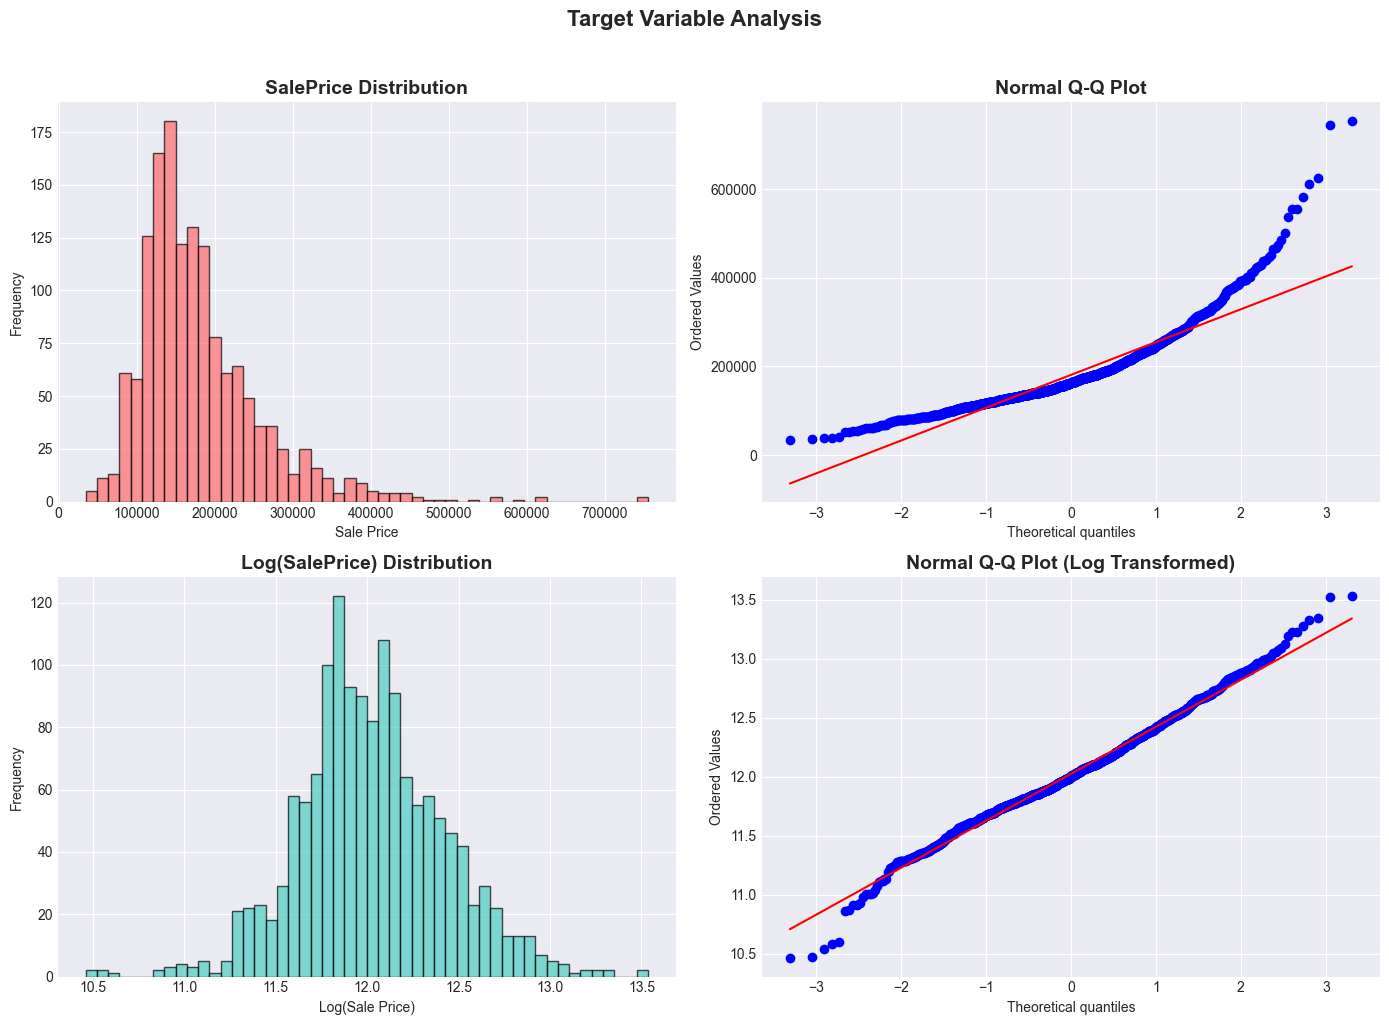

Skewness of SalePrice: 1.883
Skewness of Log(SalePrice): 0.121

✅ Log transformation significantly reduces skewness!


In [39]:
# Target variable distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

y_train = df['SalePrice']

# Original distribution
axes[0, 0].hist(y_train, bins=50, color=colors[0], alpha=0.7, edgecolor='black')
axes[0, 0].set_title('SalePrice Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sale Price')
axes[0, 0].set_ylabel('Frequency')

# QQ plot
probplot(y_train, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Normal Q-Q Plot', fontsize=14, fontweight='bold')

# Log transformed distribution
y_train_log = np.log1p(y_train)
axes[1, 0].hist(y_train_log, bins=50, color=colors[1], alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Log(SalePrice) Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Log(Sale Price)')
axes[1, 0].set_ylabel('Frequency')

# QQ plot for log transformed
probplot(y_train_log, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Normal Q-Q Plot (Log Transformed)', fontsize=14, fontweight='bold')

plt.suptitle('Target Variable Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"Skewness of SalePrice: {y_train.skew():.3f}")
print(f"Skewness of Log(SalePrice): {y_train_log.skew():.3f}")
print("\n✅ Log transformation significantly reduces skewness!")

### 4.2 Missing Values Analysis

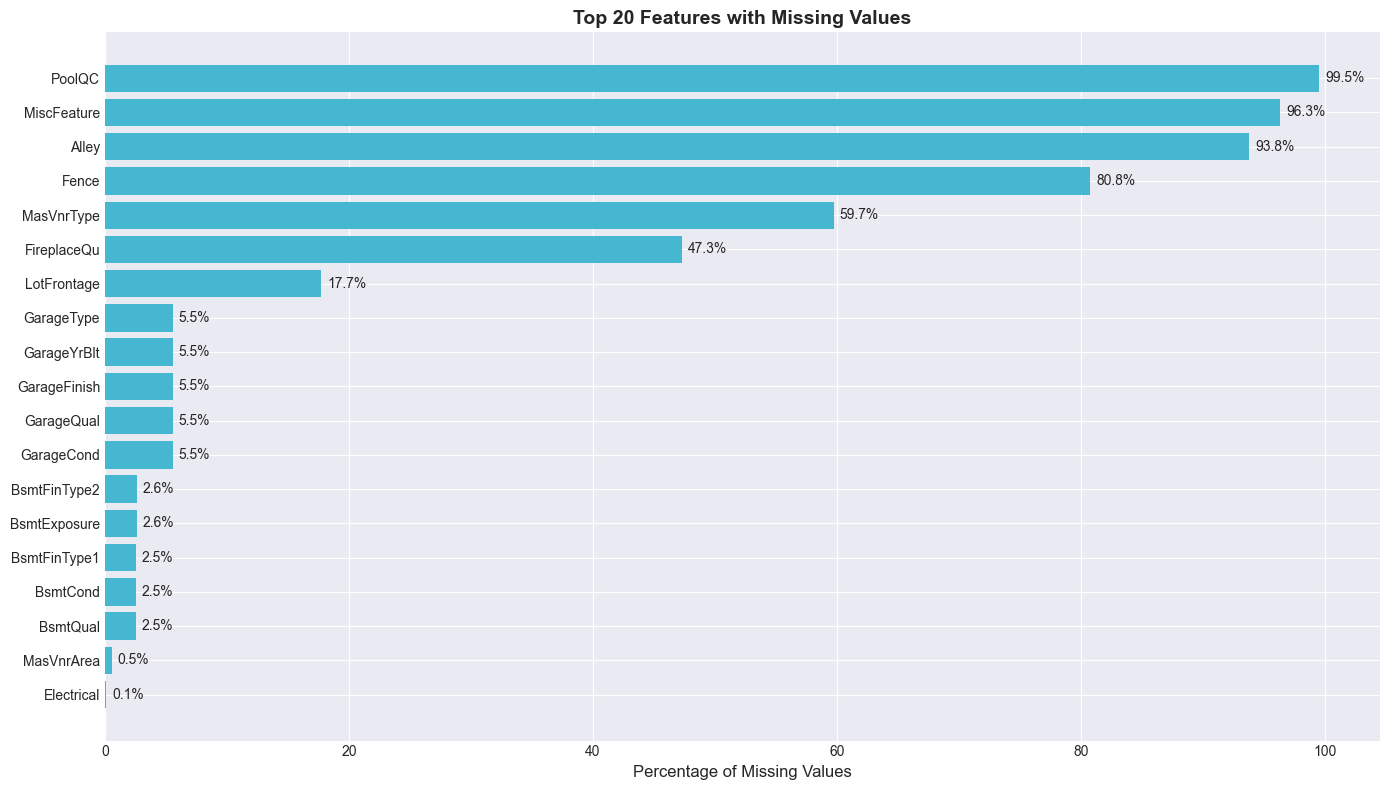


📊 Missing Values Summary:
Total features with missing values: 19

Top 10 features with missing values:
              Missing_Count  Percentage
PoolQC                 1453      99.521
MiscFeature            1406      96.301
Alley                  1369      93.767
Fence                  1179      80.753
MasVnrType              872      59.726
FireplaceQu             690      47.260
LotFrontage             259      17.740
GarageType               81       5.548
GarageYrBlt              81       5.548
GarageFinish             81       5.548


In [40]:
# Missing values analysis
def analyze_missing_values(df):
    missing = df.isnull().sum()
    missing_pct = 100 * missing / len(df)
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Percentage': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Percentage', ascending=False)
    return missing_df

missing_df = analyze_missing_values(df)

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(14, 8))
    plt.barh(missing_df.index[:20], missing_df['Percentage'][:20], color=colors[2])
    plt.xlabel('Percentage of Missing Values', fontsize=12)
    plt.title('Top 20 Features with Missing Values', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add percentage labels
    for i, v in enumerate(missing_df['Percentage'][:20]):
        plt.text(v + 0.5, i, f'{v:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📊 Missing Values Summary:")
    print(f"Total features with missing values: {len(missing_df)}")
    print(f"\nTop 10 features with missing values:")
    print(missing_df.head(10))

### 4.3 Numerical Features Analysis

📊 Feature Types:
Numerical features: 37
Categorical features: 43


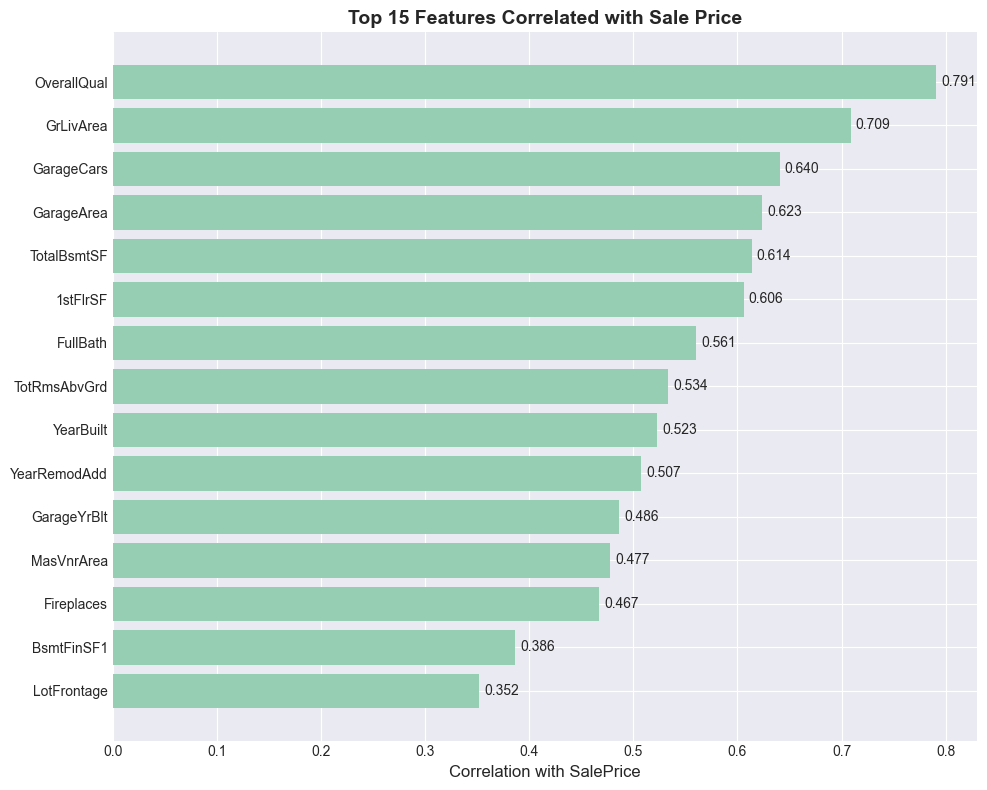


🔝 Top 10 features most correlated with SalePrice:
OverallQual    0.791
GrLivArea      0.709
GarageCars     0.640
GarageArea     0.623
TotalBsmtSF    0.614
1stFlrSF       0.606
FullBath       0.561
TotRmsAbvGrd   0.534
YearBuilt      0.523
YearRemodAdd   0.507
Name: SalePrice, dtype: float64


In [41]:
# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"📊 Feature Types:")
print(f"Numerical features: {len(numerical_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Correlation with target

# Select numerical features for correlation
numerical_data = df.select_dtypes(include=['int64', 'float64'])
correlations = numerical_data.corr()['SalePrice'].sort_values(ascending=False)

# Top correlations
top_correlations = correlations[1:16]  # Exclude SalePrice itself

plt.figure(figsize=(10, 8))
plt.barh(top_correlations.index, top_correlations.values, color=colors[3])
plt.xlabel('Correlation with SalePrice', fontsize=12)
plt.title('Top 15 Features Correlated with Sale Price', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add correlation values
for i, v in enumerate(top_correlations.values):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

print("\n🔝 Top 10 features most correlated with SalePrice:")
print(correlations[1:11])

### 4.4 Feature Relationships Visualization

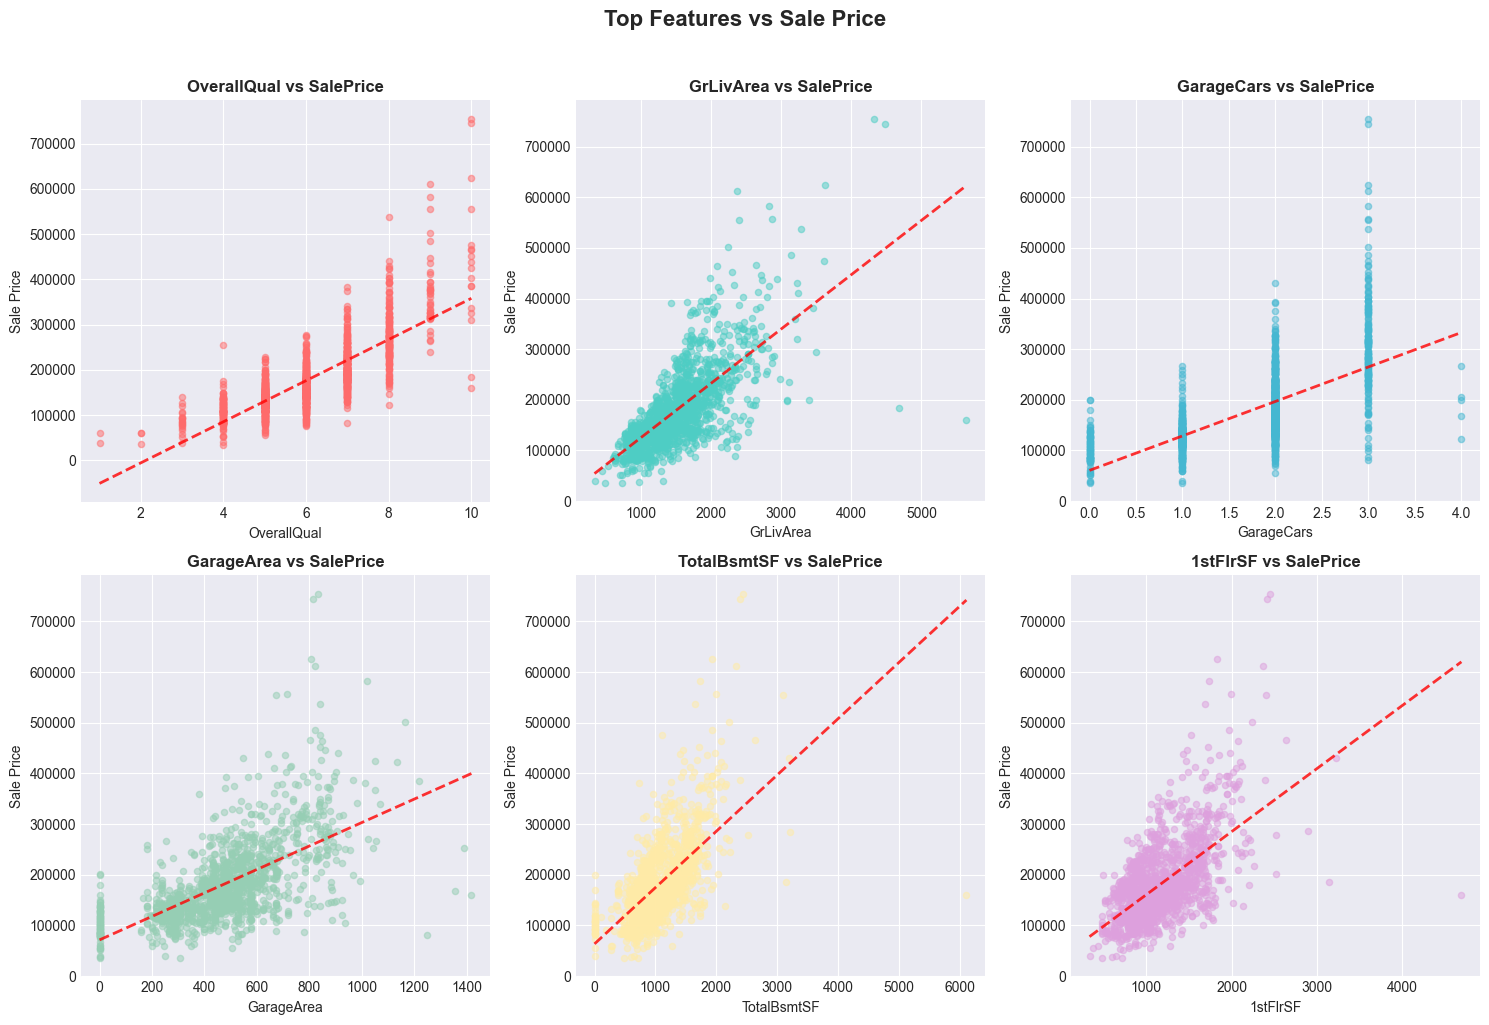

In [42]:
# Scatter plots for top correlated features
top_features = correlations[1:7].index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, feature in enumerate(top_features):
    df.plot.scatter(
        x=feature, 
        y='SalePrice', 
        ax=axes[idx], 
        color=colors[idx],
        alpha=0.5
    )
    axes[idx].set_title(f'{feature} vs SalePrice', fontweight='bold')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Sale Price')
    
    # Add trend line
    z = np.polyfit(df[feature].dropna(), 
                   df.loc[df[feature].notna(), 'SalePrice'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[feature].sort_values(), 
                   p(df[feature].sort_values()), 
                   "r--", alpha=0.8, linewidth=2)

plt.suptitle('Top Features vs Sale Price', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4.5 Analyze categorical features

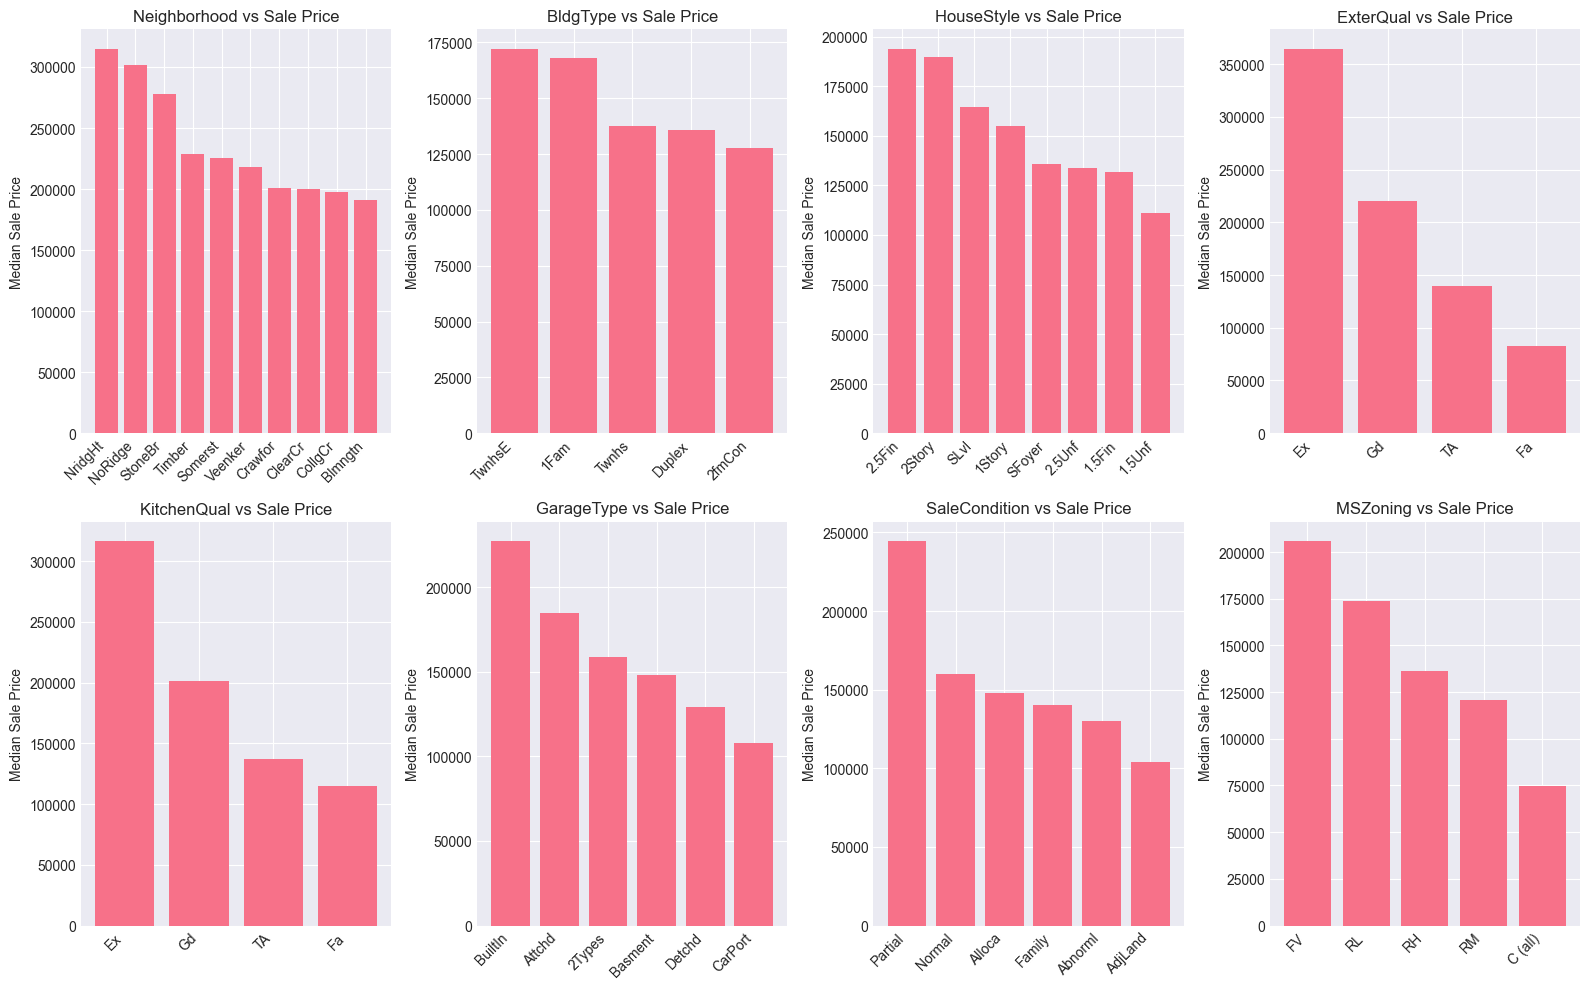

In [43]:
# Analyze categorical features
if 'SalePrice' in df.columns and len(categorical_features) > 0:
    # Select important categorical features
    important_cat_features = ['Neighborhood', 'BldgType', 'HouseStyle', 'ExterQual', 
                             'KitchenQual', 'GarageType', 'SaleCondition', 'MSZoning']
    
    available_cat_features = [f for f in important_cat_features if f in df.columns]
    
    if len(available_cat_features) >= 4:
        fig, axes = plt.subplots(2, 4, figsize=(16, 10))
        axes = axes.ravel()
        
        for idx, feature in enumerate(available_cat_features[:8]):
            df_grouped = df.groupby(feature)['SalePrice'].median().sort_values(ascending=False)
            
            # Limit to top 10 categories for readability
            if len(df_grouped) > 10:
                df_grouped = df_grouped.head(10)
            
            axes[idx].bar(range(len(df_grouped)), df_grouped.values)
            axes[idx].set_xticks(range(len(df_grouped)))
            axes[idx].set_xticklabels(df_grouped.index, rotation=45, ha='right')
            axes[idx].set_ylabel('Median Sale Price')
            axes[idx].set_title(f'{feature} vs Sale Price')
        
        plt.tight_layout()
        plt.show()

### 4.6 Selecting and detecting outliers

Number of outliers in SalePrice: 61 (4.18%)
Lower bound: $3,938
Upper bound: $340,038


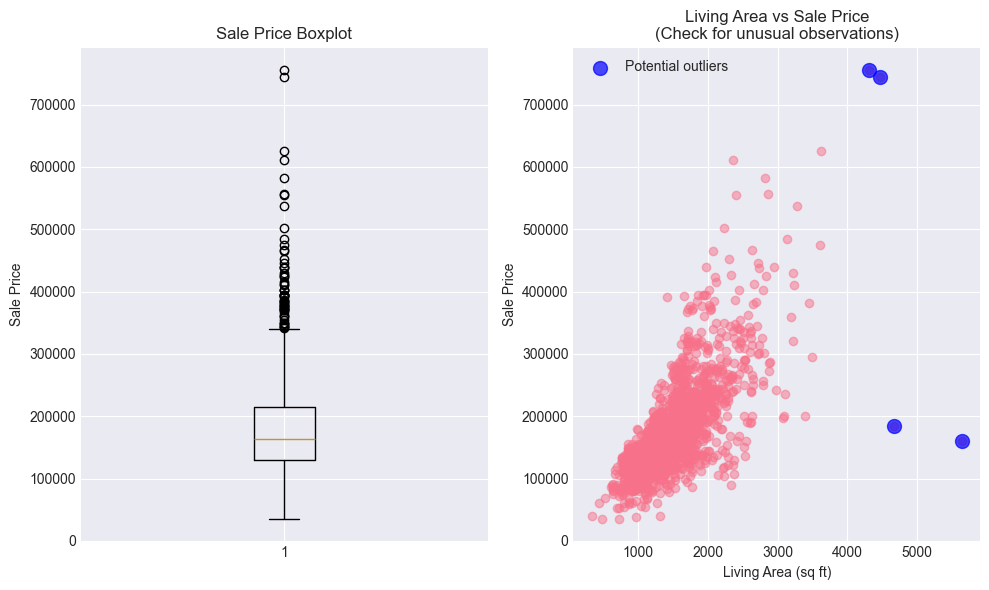

In [44]:
# Detect and visualize outliers
if 'SalePrice' in df.columns:
    # Using IQR method for outlier detection
    Q1 = df['SalePrice'].quantile(0.25)
    Q3 = df['SalePrice'].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df['SalePrice'] < lower_bound) | (df['SalePrice'] > upper_bound)]
    print(f"Number of outliers in SalePrice: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"Lower bound: ${lower_bound:,.0f}")
    print(f"Upper bound: ${upper_bound:,.0f}")
    
    # Boxplot
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.boxplot(df['SalePrice'])
    plt.ylabel('Sale Price')
    plt.title('Sale Price Boxplot')
    
    # Check for outliers in living area vs price
    if 'GrLivArea' in df.columns:
        plt.subplot(1, 2, 2)
        plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5)
        plt.xlabel('Living Area (sq ft)')
        plt.ylabel('Sale Price')
        plt.title('Living Area vs Sale Price\n(Check for unusual observations)')
        
        # Highlight potential outliers
        unusual = df[df['GrLivArea'] > 4000]
        if len(unusual) > 0:
            plt.scatter(unusual['GrLivArea'], unusual['SalePrice'], 
                       color='blue', s=100, alpha=0.7, label='Potential outliers')
            plt.legend()
    
    plt.tight_layout()
    plt.show()

## 5. Feature Engineering and data preprocessing <a id='preprocessing'></a>

### 5.1 Feature Engineering

In [45]:
def create_features(df):
    """Create new features based on domain knowledge"""
    df_new = df.copy()
    
    # Total square footage
    if 'TotalBsmtSF' in df.columns and '1stFlrSF' in df.columns and '2ndFlrSF' in df.columns:
        df_new['TotalSF'] = df_new['TotalBsmtSF'] + df_new['1stFlrSF'] + df_new['2ndFlrSF']
    
    # Total bathrooms
    if 'FullBath' in df.columns and 'HalfBath' in df.columns:
        df_new['TotalBath'] = df_new['FullBath'] + df_new['HalfBath'] * 0.5
    if 'BsmtFullBath' in df.columns and 'BsmtHalfBath' in df.columns:
        df_new['TotalBsmtBath'] = df_new['BsmtFullBath'] + df_new['BsmtHalfBath'] * 0.5
    
    # Age of house at sale
    if 'YearBuilt' in df.columns and 'YrSold' in df.columns:
        df_new['HouseAge'] = df_new['YrSold'] - df_new['YearBuilt']
    
    # Years since remodeling
    if 'YearRemodAdd' in df.columns and 'YrSold' in df.columns:
        df_new['YearsSinceRemod'] = df_new['YrSold'] - df_new['YearRemodAdd']
    
    # Total porch area
    porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
    available_porch = [col for col in porch_cols if col in df.columns]
    if available_porch:
        df_new['TotalPorchSF'] = df_new[available_porch].sum(axis=1)
    
    # Has pool
    if 'PoolArea' in df.columns:
        df_new['HasPool'] = (df_new['PoolArea'] > 0).astype(int)
    
    # Has garage
    if 'GarageArea' in df.columns:
        df_new['HasGarage'] = (df_new['GarageArea'] > 0).astype(int)
    
    # Has basement
    if 'TotalBsmtSF' in df.columns:
        df_new['HasBasement'] = (df_new['TotalBsmtSF'] > 0).astype(int)
    
    # Has fireplace
    if 'Fireplaces' in df.columns:
        df_new['HasFireplace'] = (df_new['Fireplaces'] > 0).astype(int)
    
    # Overall Quality squared (non-linear relationship)
    if 'OverallQual' in df.columns:
        df_new['OverallQual2'] = df_new['OverallQual'] ** 2
    
    return df_new

# Apply feature engineering
df_fe = create_features(df)
print(f"Original number of features: {df.shape[1]}")
print(f"Number of features after engineering: {df_fe.shape[1]}")
print(f"New features created: {df_fe.shape[1] - df.shape[1]}")

Original number of features: 80
Number of features after engineering: 91
New features created: 11


### 5.2 Data Preprocessing

#### 5.2.1 Handle missing values based on data description

#### 5.2.2 Full Pipeline

In [46]:
class MissingValueHandler(BaseEstimator, TransformerMixin):
    """
    Custom transformer for Ames dataset that applies domain-specific missing value logic.
    """
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df = X.copy()
        # --- Apply your domain rules ---
        none_features = [
            'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
            'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
            'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'MasVnrType'
        ]
        for feature in none_features:
            if feature in df.columns:
                df[feature] = df[feature].fillna('None')

        zero_features = [
            'GarageYrBlt', 'GarageArea', 'GarageCars',
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
            'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'
        ]
        for feature in zero_features:
            if feature in df.columns:
                df[feature] = df[feature].fillna(0)

        mode_features = [
            'MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 
            'Exterior2nd', 'SaleType', 'Functional'
        ]
        for feature in mode_features:
            if feature in df.columns:
                mode_val = df[feature].mode()[0] if not df[feature].mode().empty else 'Unknown'
                df[feature] = df[feature].fillna(mode_val)

        if 'LotFrontage' in df.columns and 'Neighborhood' in df.columns:
            df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
            df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

        return df
    
quality_map = {"Ex":5, "Gd":4, "TA":3, "Ta":3, "Fa":2, "Po":1, "None":0, np.nan:0}

ordinal_cols_candidates = [
    "ExterQual","ExterCond","BsmtQual","BsmtCond",
    "HeatingQC","KitchenQual","FireplaceQu",
    "GarageQual","GarageCond","PoolQC"
]
ordinal_cols = [c for c in ordinal_cols_candidates if c in df.columns]

class OrdinalMapper(BaseEstimator, TransformerMixin):
    def __init__(self, cols: List[str], mapping: Dict[str, int]):
        self.cols = cols
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        for c in self.cols:
            if c in X.columns:
                X[c] = X[c].fillna("None").map(self.mapping).astype(float)
        return X

def split_features(df: pd.DataFrame, target: str = "saleprice") -> Tuple[pd.DataFrame, pd.Series, List[str], List[str]]:
    y_log = np.log1p(df[target].copy())
    X = df.drop(columns=[target]).copy()
    cat_cols = X.select_dtypes(include=["object","category"]).columns.tolist()
    num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
    return X, y_log, cat_cols, num_cols

X, y_log, categorical_cols, numeric_cols = split_features(df, target="SalePrice")
len(numeric_cols), len(categorical_cols), len(ordinal_cols)

(36, 43, 10)

In [47]:
num_pipe = Pipeline(steps=[
    ("power", PowerTransformer(method="yeo-johnson", standardize=False)),
    ("scaler", RobustScaler())
])

# Categorical (non-ordinal): impute "Missing" + OneHot
nominal_cols = [c for c in categorical_cols if c not in ordinal_cols]
cat_pipe = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

# Ordinal: map qualities -> numeric (already numeric post-transform), still impute in case
ord_pipe = Pipeline(steps=[
    ("ordmap", OrdinalMapper(cols=ordinal_cols, mapping=quality_map)),
    ("imputer", SimpleImputer(strategy="most_frequent"))  # safeguard
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipe, numeric_cols),
    ("cat", cat_pipe, nominal_cols),
    ("ord", ord_pipe, ordinal_cols),
], remainder="drop")

full_pipeline = Pipeline([
    ("missing_handler", MissingValueHandler()),  # custom step
    ("preprocessor", preprocessor)
])

print("Preprocessing pipeline created successfully!")

Preprocessing pipeline created successfully!


In [48]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

,steps,"[('missing_handler', ...), ('preprocessor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## 6. Model Developement <a id='modeling'></a>

In [49]:
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """Train and evaluate a model"""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Convert back from log scale
    y_train_pred_exp = np.expm1(y_train_pred)
    y_val_pred_exp = np.expm1(y_val_pred)
    y_train_exp = np.expm1(y_train)
    y_val_exp = np.expm1(y_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train_exp, y_train_pred_exp))
    val_rmse = np.sqrt(mean_squared_error(y_val_exp, y_val_pred_exp))
    train_mae = mean_absolute_error(y_train_exp, y_train_pred_exp)
    val_mae = mean_absolute_error(y_val_exp, y_val_pred_exp)
    train_r2 = r2_score(y_train_exp, y_train_pred_exp)
    val_r2 = r2_score(y_val_exp, y_val_pred_exp)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, 
                                scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    
    results = {
        'Model': model_name,
        'Train RMSE': train_rmse,
        'Val RMSE': val_rmse,
        'Train MAE': train_mae,
        'Val MAE': val_mae,
        'Train R2': train_r2,
        'Val R2': val_r2,
        'CV RMSE': cv_rmse,
        'Overfit': train_rmse - val_rmse
    }
    
    return results, model

In [50]:
# Split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (1168, 79)
Validation set size: (292, 79)


In [51]:
# Prepare data with preprocessing
X_train_preprocessed = full_pipeline.fit_transform(X_train)
X_val_preprocessed = full_pipeline.transform(X_val)

print(f"Preprocessed training data shape: {X_train_preprocessed.shape}")
print(f"Preprocessed validation data shape: {X_val_preprocessed.shape}")

Preprocessed training data shape: (1168, 260)
Preprocessed validation data shape: (292, 260)


In [52]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10),
    'Lasso Regression': Lasso(alpha=0.001),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

results_list = []
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    result, trained_model = evaluate_model(
        model, X_train_preprocessed, y_train, 
        X_val_preprocessed, y_val, name
    )
    results_list.append(result)
    trained_models[name] = trained_model

# Create results dataframe
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values('Val RMSE')
print("\n" + "="*80)
print("Model Performance Comparison:")
print("="*80)
display(results_df)

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet...
Training Decision Tree...
Training Random Forest...
Training Gradient Boosting...
Training XGBoost...

Model Performance Comparison:


,Model,Train RMSE,Val RMSE,Train MAE,Val MAE,Train R2,Val R2,CV RMSE,Overfit
3,ElasticNet,23286.155,26228.419,13415.868,14851.572,0.909,0.910,0.133,-2942.263
1,Ridge Regression,23803.054,26409.110,13174.992,15075.651,0.905,0.909,0.135,-2606.056
7,XGBoost,7889.055,26607.970,5465.927,16086.210,0.990,0.908,0.136,-18718.916
6,Gradient Boosting,6930.403,27266.274,5070.366,16218.555,0.992,0.903,0.135,-20335.871
2,Lasso Regression,26603.348,27678.772,14256.535,15546.417,0.881,0.900,0.133,-1075.424
5,Random Forest,11356.381,29687.279,6582.831,17532.855,0.978,0.885,0.146,-18330.899
0,Linear Regression,18095.784,30727.740,11437.107,16230.289,0.945,0.877,0.148,-12631.956
4,Decision Tree,8320.698,32248.120,5079.449,23358.984,0.988,0.864,0.208,-23927.422


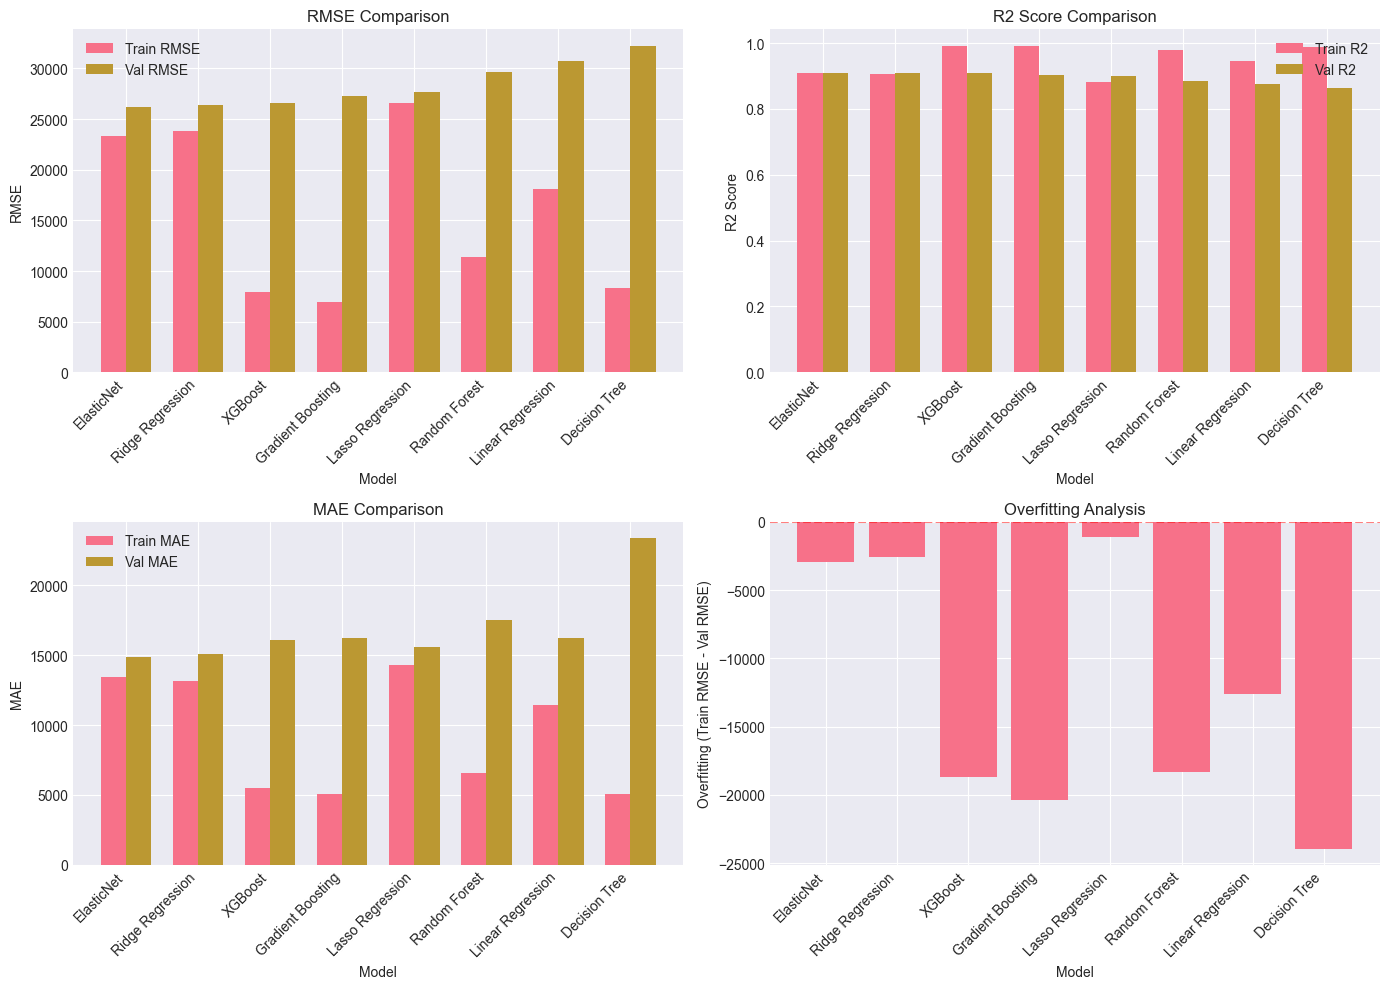

In [53]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# RMSE comparison
x = np.arange(len(results_df))
width = 0.35

axes[0, 0].bar(x - width/2, results_df['Train RMSE'], width, label='Train RMSE')
axes[0, 0].bar(x + width/2, results_df['Val RMSE'], width, label='Val RMSE')
axes[0, 0].set_xlabel('Model')
axes[0, 0].set_ylabel('RMSE')
axes[0, 0].set_title('RMSE Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 0].legend()

# R2 comparison
axes[0, 1].bar(x - width/2, results_df['Train R2'], width, label='Train R2')
axes[0, 1].bar(x + width/2, results_df['Val R2'], width, label='Val R2')
axes[0, 1].set_xlabel('Model')
axes[0, 1].set_ylabel('R2 Score')
axes[0, 1].set_title('R2 Score Comparison')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[0, 1].legend()

# MAE comparison
axes[1, 0].bar(x - width/2, results_df['Train MAE'], width, label='Train MAE')
axes[1, 0].bar(x + width/2, results_df['Val MAE'], width, label='Val MAE')
axes[1, 0].set_xlabel('Model')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_title('MAE Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 0].legend()

# Overfitting analysis
axes[1, 1].bar(x, results_df['Overfit'])
axes[1, 1].set_xlabel('Model')
axes[1, 1].set_ylabel('Overfitting (Train RMSE - Val RMSE)')
axes[1, 1].set_title('Overfitting Analysis')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(results_df['Model'], rotation=45, ha='right')
axes[1, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning <a id='modeling'></a>

In [54]:
# Select best model for hyperparameter tuning
best_model_name = results_df.iloc[0]['Model']
print(f"Best model based on validation RMSE: {best_model_name}")
print(f"Validation RMSE: ${results_df.iloc[0]['Val RMSE']:,.2f}")

# Tune XGBoost (typically one of the best performers)
if 'XGBoost' in trained_models:
    print("\nTuning XGBoost hyperparameters...")
    
    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    }
    
    xgb_model = XGBRegressor(random_state=42)
    
    grid_search = GridSearchCV(
        xgb_model,
        param_grid,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train_preprocessed, y_train)
    
    print(f"\nBest parameters: {grid_search.best_params_}")
    print(f"Best CV score: {np.sqrt(-grid_search.best_score_):.4f}")
    
    # Evaluate tuned model
    tuned_result, tuned_model = evaluate_model(
        grid_search.best_estimator_,
        X_train_preprocessed, y_train,
        X_val_preprocessed, y_val,
        'XGBoost (Tuned)'
    )
    
    print("\nTuned XGBoost Performance:")
    for key, value in tuned_result.items():
        if key != 'Model':
            print(f"{key}: {value:,.2f}")

Best model based on validation RMSE: ElasticNet
Validation RMSE: $26,228.42

Tuning XGBoost hyperparameters...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best CV score: 0.1265

Tuned XGBoost Performance:
Train RMSE: 9,408.12
Val RMSE: 26,477.59
Train MAE: 6,614.70
Val MAE: 15,183.43
Train R2: 0.99
Val R2: 0.91
CV RMSE: 0.13
Overfit: -17,069.47


## 8. Final Model Selection and Evaluation

Final selected model: XGBoost (Tuned)


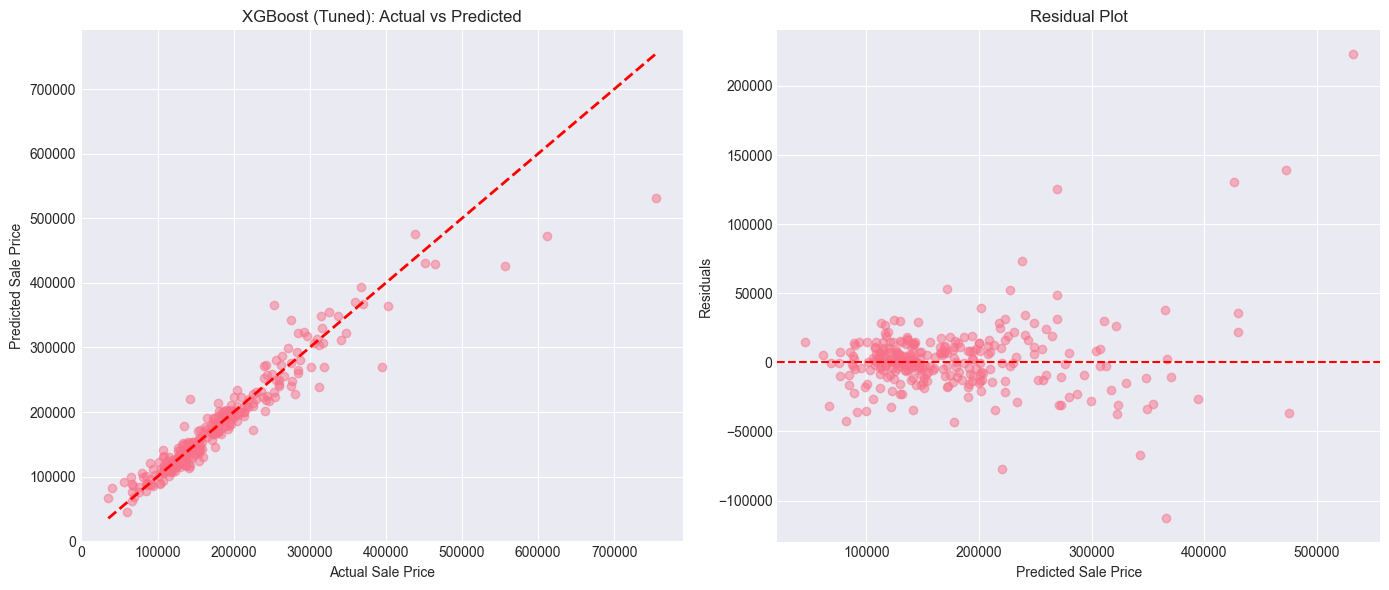


Final Model Performance on Validation Set:
RMSE: $26,477.59
MAE: $15,183.43
R² Score: 0.9086

This means our predictions are typically off by about $15,183


In [55]:
# Select the final model
if 'tuned_model' in locals():
    final_model = tuned_model
    final_model_name = 'XGBoost (Tuned)'
else:
    final_model = trained_models[best_model_name]
    final_model_name = best_model_name

print(f"Final selected model: {final_model_name}")

# Final predictions
final_predictions = final_model.predict(X_val_preprocessed)
final_predictions_exp = np.expm1(final_predictions)
y_val_exp = np.expm1(y_val)

# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Actual vs Predicted
axes[0].scatter(y_val_exp, final_predictions_exp, alpha=0.5)
axes[0].plot([y_val_exp.min(), y_val_exp.max()], 
             [y_val_exp.min(), y_val_exp.max()], 
             'r--', lw=2)
axes[0].set_xlabel('Actual Sale Price')
axes[0].set_ylabel('Predicted Sale Price')
axes[0].set_title(f'{final_model_name}: Actual vs Predicted')

# Residuals
residuals = y_val_exp - final_predictions_exp
axes[1].scatter(final_predictions_exp, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Sale Price')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')

plt.tight_layout()
plt.show()

# Print final metrics
final_rmse = np.sqrt(mean_squared_error(y_val_exp, final_predictions_exp))
final_mae = mean_absolute_error(y_val_exp, final_predictions_exp)
final_r2 = r2_score(y_val_exp, final_predictions_exp)

print("\nFinal Model Performance on Validation Set:")
print(f"RMSE: ${final_rmse:,.2f}")
print(f"MAE: ${final_mae:,.2f}")
print(f"R² Score: {final_r2:.4f}")
print(f"\nThis means our predictions are typically off by about ${final_mae:,.0f}")

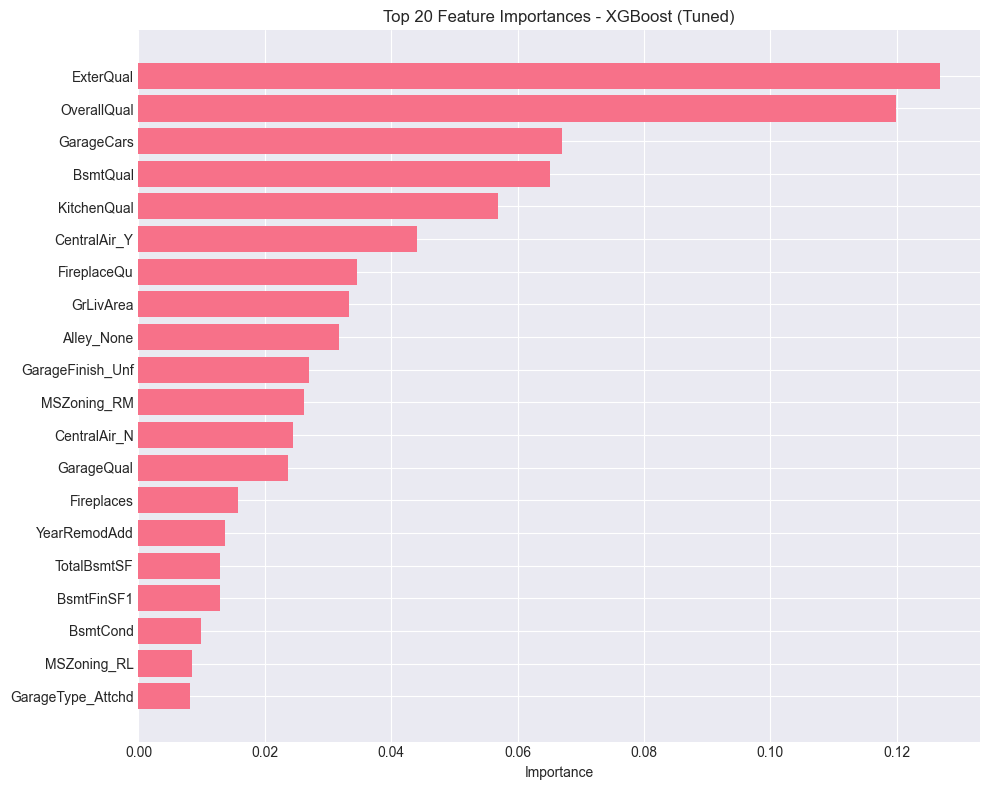


Top 10 Most Important Features:


,Feature,Importance
250,ExterQual,0.127
3,OverallQual,0.120
25,GarageCars,0.067
252,BsmtQual,0.065
255,KitchenQual,0.057
199,CentralAir_Y,0.044
256,FireplaceQu,0.035
15,GrLivArea,0.033
44,Alley_None,0.032
221,GarageFinish_Unf,0.027


In [56]:
if hasattr(final_model, 'feature_importances_'):
    ct = full_pipeline.named_steps['preprocessor']
    feature_names = []

    # --- Numeric features ---
    numerical_features = numeric_cols
    feature_names.extend(numerical_features)

    # --- Categorical (nominal, one-hot encoded) ---
    if 'cat' in ct.named_transformers_:
        cat_pipe = ct.named_transformers_['cat']
        if hasattr(cat_pipe.named_steps['onehot'], 'get_feature_names_out'):
            cat_feature_names = cat_pipe.named_steps['onehot'].get_feature_names_out(nominal_cols)
            feature_names.extend(cat_feature_names)

    # --- Ordinal features (already numeric) ---
    if 'ord' in ct.named_transformers_:
        feature_names.extend(ordinal_cols)

    # --- Match length with model features ---
    importance_df = pd.DataFrame({
        'Feature': feature_names[:len(final_model.feature_importances_)],
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    # --- Plot top 20 ---
    plt.figure(figsize=(10, 8))
    top_features = importance_df.head(20)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Importance')
    plt.title(f'Top 20 Feature Importances - {final_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Important Features:")
    display(importance_df.head(10))



## 10. Save the Model

In [65]:
import pickle
import joblib

# Save the model and preprocessor
model_artifacts = {
    'model': final_model,
    'preprocessor': full_pipeline,
    'model_name': final_model_name,
    'feature_names': X.columns.tolist(),
    'numerical_features': numerical_features,
    'categorical_features': categorical_features,
    'metrics': {
        'rmse': final_rmse,
        'mae': final_mae,
        'r2': final_r2
    }
}

# Save with joblib (better for scikit-learn models)
joblib.dump(model_artifacts, 'models/house_price_model.pkl')
print("Model saved as 'house_price_model.pkl'")

# Also save preprocessing pipeline separately
joblib.dump(preprocessor, 'preprocessor.pkl')
print("Preprocessor saved as 'preprocessor.pkl'")

Model saved as 'house_price_model.pkl'
Preprocessor saved as 'preprocessor.pkl'


## 10. Model Usage Example

In [66]:
# Example: Load and use the saved model
loaded_artifacts = joblib.load('models/house_price_model.pkl')
loaded_model = loaded_artifacts['model']
loaded_preprocessor = loaded_artifacts['preprocessor']

# Make a prediction on a sample from validation set
sample_idx = 5
sample = X_val.iloc[[sample_idx]]
sample_actual_price = np.expm1(y_val.iloc[sample_idx])

# Preprocess and predict
sample_preprocessed = loaded_preprocessor.transform(sample)
sample_prediction = loaded_model.predict(sample_preprocessed)[0]
sample_prediction_price = np.expm1(sample_prediction)

print("Sample Prediction:")
print(f"Actual Price: ${sample_actual_price:,.2f}")
print(f"Predicted Price: ${sample_prediction_price:,.2f}")
print(f"Difference: ${abs(sample_actual_price - sample_prediction_price):,.2f}")
print(f"Error: {abs(sample_actual_price - sample_prediction_price) / sample_actual_price * 100:.2f}%")

Sample Prediction:
Actual Price: $75,500.00
Predicted Price: $75,853.79
Difference: $353.79
Error: 0.47%
